# ObsID : 0945020133, SRCNUM : 3, Instru : EMOS2
**Simbad :** Seyfert 1 Galaxy (2XMM J033204.0-273726) https://simbad.cds.unistra.fr/simbad/sim-id?Ident=%40645704&Name=2XMM%20J033204.0-273726&submit=submit

## ESASky
On ESASky, the pointer for GLADE is slightly off the source, but no other sources seem to correspond to it in any wavelength. https://sky.esa.int/esasky/?target=53.01683333333333%20-27.62344444444444&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``

- Stack Catalogue name : 4XMMs J033204.0-2737254XMM J033204.0-273725
- RA : 03h 32m 04.042s
- DEC : -27° 37' 25.23"

``GLADE``

- No : 1 697 6000
- RA : 3h 32m 04.416s
- DEC : -27° 37' 39.40"
- Distance : 7173.0551 Mpc

In [7]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

### Redshift

In [10]:
def redshift(d_Mpc):
    H0 = 70 # Hubble constant (km/s/Mpc)
    c = 299792.458 # km/s
    return H0*d_Mpc/c

z = redshift(7173.0551)
print("Redshift : z =", z)

Redshift : z = 1.674871543966593


## Fit statistic

In [8]:
Fit.statMethod = "cstat"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [5]:
AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp_cstat.fits')[0])

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: ObsID0945020133_SRCNUM3_EMOS2_spectrum_grp_cstat.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.408e-03 +/- 7.987e-04 (49.8 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-124
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 1.56e+04 sec
 Using fit statistic: cstat
 Using Background File                MOSbackground_spectrum.fits
  Background Exposure Time: 1.56e+04 sec
 Using Response (RMF) File            MOS.rmf for Source 1
 Using Auxiliary Response (ARF) File  MOS.arf



In [4]:
n_cts = 1.56e+04*4.408e-03

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 68.7648

The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.


The low number of counts indicates that we should use cstat instead of chi statistics.

## Plot spectrum

In [6]:
Plot.xAxis="keV"
#Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
#Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")
spec.ignore("**-0.2 12-**")

     7 channels (1-7) ignored in spectrum #     1
   113 channels (12,124) ignored in spectrum #     1



(-0.5, 857.5, 662.5, -0.5)

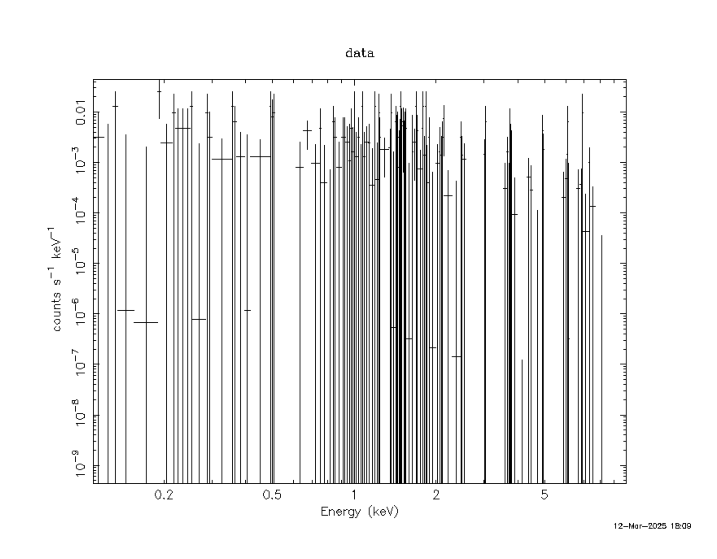

In [29]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum2.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model
**tbabs :**

In [11]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                3469.951     using 4 bins.

Test statistic : Chi-Squared                759816.1     using 4 bins.
 Null hypothesis probability of 0.0e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm
3.57196      755.89       -3       1647.15       61.0542       65.4629
2.92187      5.90706e-09   5       644.963       19.6741       580.788
2.92174      0.013955      4       644.956       19.6736       580.829
2.92045      

(-0.5, 856.5, 660.5, -0.5)

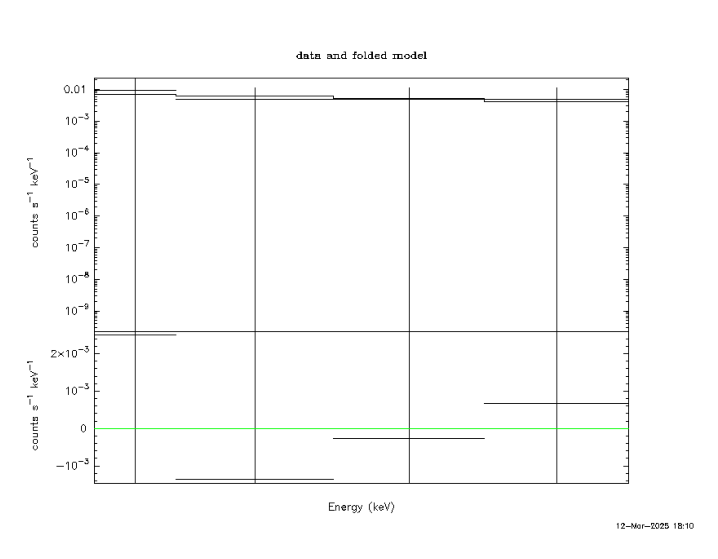

In [8]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody2.png')[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [12]:
AllModels.clear()
moz = Model("ztbabs*bbody")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbody_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bbody      kT         keV      3.00000      +/-  0.0          
   4    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                3465.994     using 4 bins.

Test statistic : Chi-Squared                758101.7     using 4 bins.
 Null hypothesis probability of 0.0e+00 with 1 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic                5118.697     using 4 bins.

Test statistic : Chi-Squared              1.643680e+06     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                         

(-0.5, 862.5, 661.5, -0.5)

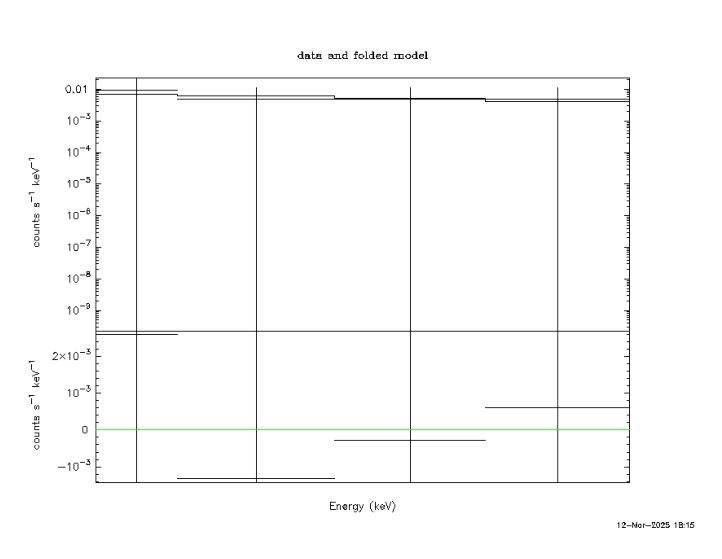

In [19]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody2_z.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model
**tbabs :**

In [13]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                1382.491     using 4 bins.

Test statistic : Chi-Squared                124984.7     using 4 bins.
 Null hypothesis probability of 0.0e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm
3.55362      277.637      -3       406.921       197.207      0.392710
1.46148      0.0078227    -4       186.774       51.0400       10.0569
1.3263       0.0803185    -5       211.117       8.21508       3.91366
0.120032    

(-0.5, 856.5, 655.5, -0.5)

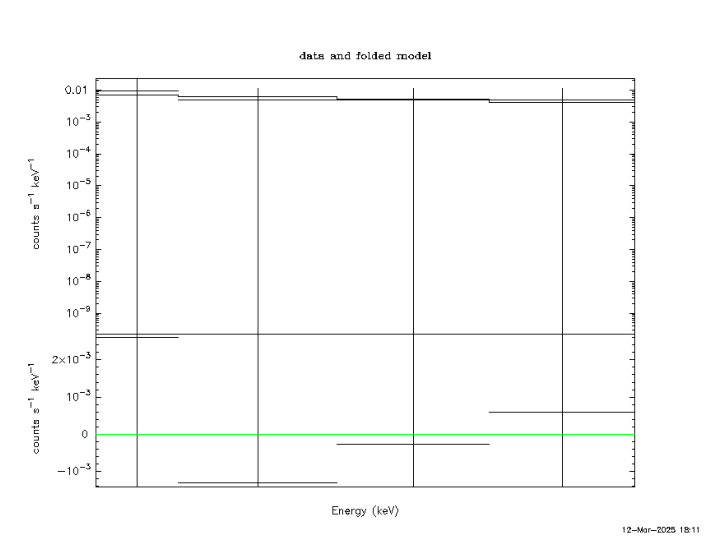

In [10]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss2.png')[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [14]:
AllModels.clear()
moz = Model("ztbabs*bremss")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bremss     kT         keV      7.00000      +/-  0.0          
   4    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                1376.959     using 4 bins.

Test statistic : Chi-Squared                124009.1     using 4 bins.
 Null hypothesis probability of 0.0e+00 with 1 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic                7639.562     using 4 bins.

Test statistic : Chi-Squared              3.734196e+06     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                        

(-0.5, 850.5, 652.5, -0.5)

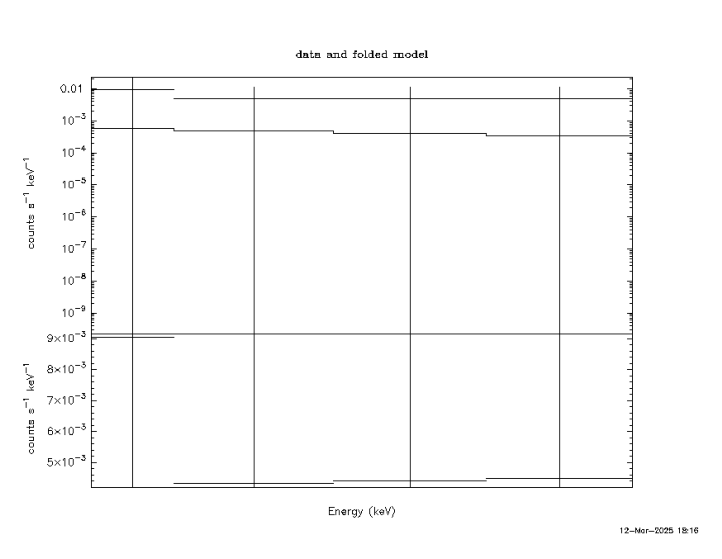

In [21]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss2_z.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model
**tbabs :**

In [15]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : C-Statistic                654.2664     using 4 bins.

Test statistic : Chi-Squared                29924.67     using 4 bins.
 Null hypothesis probability of 0.00e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        5:norm
3.57196      202.349      -3       13.3551     0.0321330      0.276266


***XSPEC Error:  No variable parameters for fit 

Exception: Error executing command: fit

**ztbabs :**

In [16]:
AllModels.clear()
moz = Model("ztbabs*apec")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   apec       kT         keV      1.00000      +/-  0.0          
   4    2   apec       Abundanc            1.00000      frozen
   5    2   apec       Redshift            0.0          frozen
   6    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                644.4755     using 4 bins.

Test statistic : Chi-Squared                29079.49     using 4 bins.
 Null hypothesis probability of 0.00e+00 with 1 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic                7157.704     using 4 bins.

Test statistic : Chi-Squared              3.268676e+06     using 4 bins.
 Null h

(-0.5, 860.5, 661.5, -0.5)

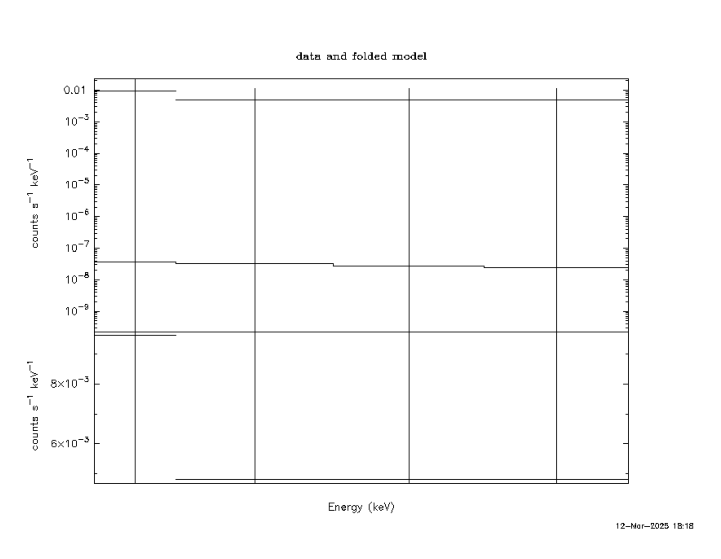

In [25]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec2_z.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model
**tbabs :**

In [17]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                2880.262     using 4 bins.

Test statistic : Chi-Squared                527450.9     using 4 bins.
 Null hypothesis probability of 0.0e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
3.44446      679.209      -3       1125.15      -2.02447      0.486586
3.23197      0.0669125     1       1075.78      -2.12886      0.683861
0.782307     0.155434      0       938.223      -2.37729       1.46148
0.2345    

(-0.5, 854.5, 657.5, -0.5)

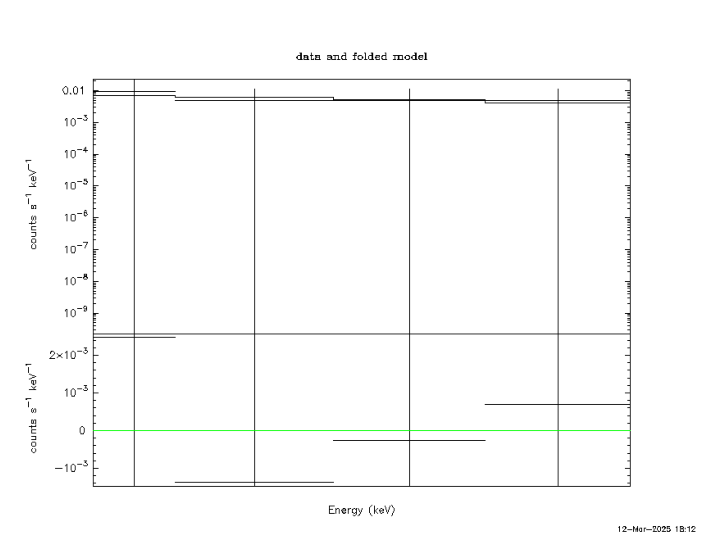

In [16]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw2.png')[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [18]:
AllModels.clear()
moz = Model("ztbabs*powerlaw")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   4    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                2871.938     using 4 bins.

Test statistic : Chi-Squared                524443.6     using 4 bins.
 Null hypothesis probability of 0.0e+00 with 1 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic                10155.22     using 4 bins.

Test statistic : Chi-Squared              6.526114e+06     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                      

(-0.5, 851.5, 660.5, -0.5)

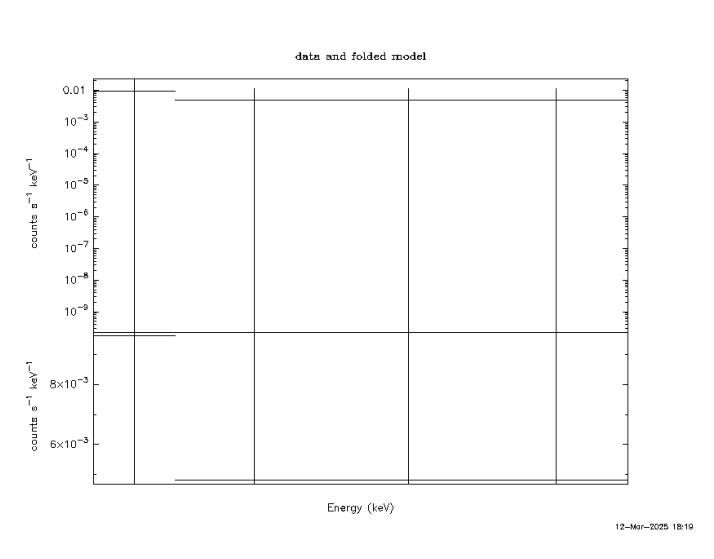

In [27]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw2_z.png')[0])
plt.imshow(img)
plt.axis('off')

## Flux
### X-ray flux

In [19]:
AllModels.calcFlux(".2 12.0")

 Model Flux 6.185e-11 photons (7.606e-19 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [43]:
Flux = 7.606e-19 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END+f"F_X = {Flux} ergs/cm^2/s")

X-ray flux : F_X = 7.606e-19 ergs/cm^2/s


### Optical flux
No GAIA information, so we use the lower limit of 20.7 mag.

In [44]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)
    
G = 20.7

F = F_optical(G)

print(color.BOLD+"Optical  flux : "+color.END+f"F_opt = {F} ergs/cm^2/s")

Optical  flux : F_opt = 5.510478332622621e-14 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [45]:
print(color.BOLD+"X-ray flux / Optical flux ratio : "+color.END+f"F_x-ray/F_optical = {Flux/F}")
print(f"F_x-ray = {Flux/F}*F_optical")

X-ray flux / Optical flux ratio : F_x-ray/F_optical = 1.3802794496027081e-05
F_x-ray = 1.3802794496027081e-05*F_optical


## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** from ESASky

- RA = 53.0168404°
- Dec = -27.6236739°

53.02 -27.62

**Column density :** nH = 4*10^20 cm^-2

In [21]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"(tbabs) : {nH_bbody*10**22}")
print(f"(ztbabs) : {nH_bbody_z*10**22}")
print()
print(color.BOLD+"bremss"+color.END)
print(f"(tbabs) : {nH_bremss*10**22}")
print(f"(ztbabs) : {nH_bremss_z*10**22}")
print()
print(color.BOLD+"apec"+color.END)
#print(f"(tbabs) : {nH_apec*10**22}")
print(f"(ztbabs) : {nH_apec_z*10**22}")
print()
print(color.BOLD+"powerlaw"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")
print(f"(ztbabs) : {nH_powerlaw_z*10**22}")

The different models give a column density of :

bbody
(tbabs) : 5.554548642883065e+24
(ztbabs) : 3.426339947936587e+24

bremss
(tbabs) : 1.6366592737348227e+24
(ztbabs) : 2.737368282185277e+26

apec
(ztbabs) : 7.482077715155208e+24

powerlaw
(tbabs) : 9.014969394299273e+24
(ztbabs) : 1.6326393944736337e+25


### Luminosity

In [42]:
"""GLADE"""

d_kpc = 7173055.1 # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"(GLADE)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosité : {Luminosity} erg/s")

(GLADE)
Distance : 2.213389612207e+28 cm
Luminosité : 4.682544570817866e+39 erg/s
